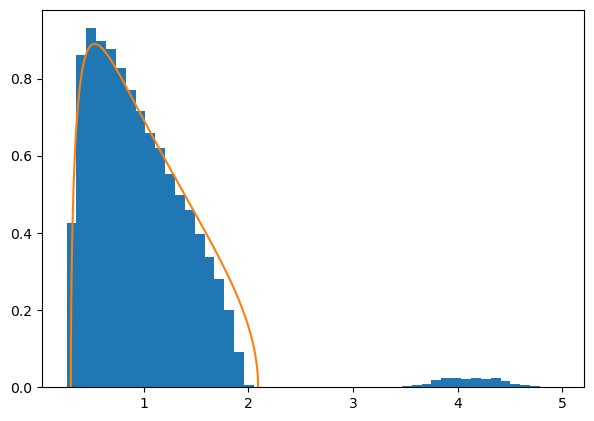

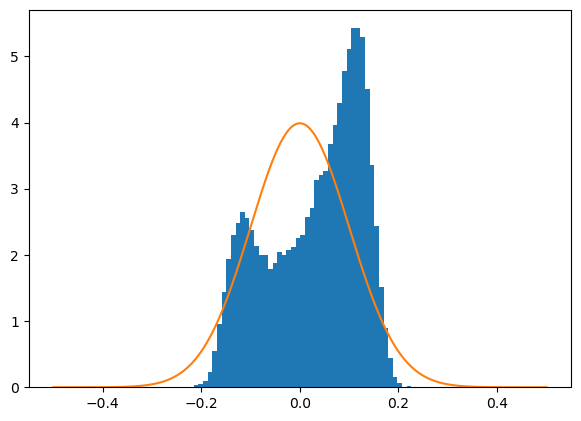

In [17]:
#!/usr/bin/python3.7
#CS4_factor_models.py
#Parth Parakh
#purpose: Marcenko-Pastur distribution && Porter-Thomas law

#---------------------------------------------------------------------
#import modules
import numpy as np
import matplotlib.pyplot as plt
#----------------------------------------------------------------------

flag = 2; # 1 for one-factor model (common to all variables), 2 for two-factor model

N = 100; # Number of time series
T = 500; # Length of time series
q = N/T; # Rectangularity ratio
sigma = 1; # Standard deviation of time series values

Nm = 500; # Number of random matrices to generate

if flag==1 :
    
    epsilon = 0.2; #Standard deviation of factor common to all variables
    L = []; # Empty array to collect all eigenvalues
    V = []; # Empty array to collect leading eigenvectors
    for i in range(Nm):
        #Forming time series as idiosyncratic part plus common factor
        X = sigma*np.random.randn(N,T) + epsilon*np.ones( (N,T) )*np.random.randn(1,T);
        C = np.corrcoef(X);
        eig_values,eig_vectors = np.linalg.eig(C); # Eigenvalues and eigenvectors of last matrix used in loop       
        
        L = np.append(L,eig_values);
        V = np.append(V,eig_vectors[:,0]);
    
    
    plot0 = plt.figure(0,figsize=(7,5), dpi=100) 
    plt.hist(L,bins = 50, density=True)
    
    #Defining and plotting Marcenko-Pastur distribution
    lp = (sigma**2)*(1+np.sqrt(q))**2;
    lm = (sigma**2)*(1-np.sqrt(q))**2;
    x = np.linspace(lm,lp,1000);
    p = np.sqrt((x-lm)*(lp-x))/(2*np.pi*q*sigma**2*x);

    plt.plot(x,p)
    
    plot1 = plt.figure(1,figsize=(7,5), dpi=100) 
    plt.hist(V,bins = 50, density=True)
    
    #Defining and plotting Porter-Thomas law
    s = 1/np.sqrt(N); # Standard deviation of Porter-Thomas law
    x = np.linspace(-5*s,5*s,1000);
    p = np.exp(-x**2/(2*(s**2)))/np.sqrt(2*np.pi*s**2);

    plt.plot(x,p);
    
elif flag==2 :
    
    epsilon1 = 0.25; # Standard deviation of first factor
    epsilon2 = 0.25; # Standard deviation of sectond factor
    f = 0.5; # Fraction of variables affected by first factor
    
    L = []; # Empty array to collect all eigenvalues
    V = []; # Empty array to collect leading eigenvectors
    
    for i in range(Nm):
        #Forming time series as idiosyncratic part plus common factor
        #first factor
        aux1 = np.ones( (N,T) )*np.random.randn(1,T);
        aux1[:round(f*N),:] = 0; # Selecting first f*N variables as those affected by first factor
        
        aux2 = np.ones( (N,T) )*np.random.randn(1,T);
        aux2[round(f*N)+1:,:] = 0; # Selecting first f*N variables as those affected by second factor
        
        X = sigma*np.random.randn(N,T) + epsilon1*aux1 + epsilon2*aux2;
        
        C = np.corrcoef(X);
        
        eig_values,eig_vectors = np.linalg.eig(C); # Eigenvalues and eigenvectors of last matrix used in loop       

        L = np.append(L,eig_values);
        V = np.append(V,eig_vectors[:,0]);
        
    
    plot0 = plt.figure(0,figsize=(7,5), dpi=100) 
    plt.hist(L,bins = 50, density=True)
    
    #Defining and plotting Marcenko-Pastur distribution
    lp = (sigma**2)*(1+np.sqrt(q))**2;
    lm = (sigma**2)*(1-np.sqrt(q))**2;
    x = np.linspace(lm,lp,1000);
    p = np.sqrt((x-lm)*(lp-x))/(2*np.pi*q*sigma**2*x);

    plt.plot(x,p)
    
    plot1 = plt.figure(1,figsize=(7,5), dpi=100) 
    plt.hist(V,bins = 50, density=True)
    
    #Defining and plotting Porter-Thomas law
    s = 1/np.sqrt(N); # Standard deviation of Porter-Thomas law
    x = np.linspace(-5*s,5*s,1000);
    p = np.exp(-x**2/(2*(s**2)))/np.sqrt(2*np.pi*s**2);

    plt.plot(x,p);